# Eksempel: Idealisert pendel

I dette kurset har vi sett hvordan vi kan bruke Eulers metode til å løse nokså generelle, skalare differensialligninger.
Vi har også sett på eksempler hvor vi har satt opp Eulers metode for andre ordens *lineære* differensialligninger, som vi vet at det er mulig å løse eksakt.
I praktiske problemstillinger har vi typisk koblede ligninger for *mange* ukjente, og disse systemene er så godt som aldri lineære!

Her skal vi ta for oss en litt mer komplisert andreordens differensialligning, hvor vi faktisk trenger numeriske metoder for å løse den, i motsetning til de lineære ligningene vi har sett på tidligere.

Dette er også en god anledning til å se på *faseportretter* for slike andreordens differensialligninger: dette er en mer generell versjon av retningsfeltet som vi så på tidligere.
I tillegg gir faseportrettene oss en fin måte å visualisere en annen fallgruve knyttet til stabilitet for Eulers metode, nå i to dimensjoner.

Merk at dette er et ganske omstendelig eksempel, som på noen punkter går litt utenfor hovedtemaene i pensum.
På den annen side gir dette en smakebit på hva man kan bruke numeriske metoder til, og hvordan man med noen små justeringer av de teknikkene dere har lært kan implementere andre varianter av de numeriske metodene som kan være mer passende for et problem.

### Oppsett

Vi ser på en *idealisert*, eller ideell, pendel: dette er en punktmasse med masse $m$ opphengt i en masseløs stang med lengde $l$.
Oppførselen til pendelen kan beskrives av hvordan én enkelt størrelse varierer over tid, nemlig vinkelutslaget $\theta$.
Figuren nedenunder viser oppsettet.

<img src="3_pendel.png" style="width: 25%">

Her betyr $\theta = 0$ at pendelen henger rett ned, imens $\theta = \pm\pi$ betyr at pendelen står akkurat på balansepunktet hvor den peker rett opp.
Videre vil $\theta = 2\pi$ bety at pendelen har rotert én hel runde i positiv retning (mot klokka) og igjen henger rett ned.

### Differensialligningen

Nå ønsker vi å beskrive hvordan pendelen oppfører seg dersom vi slipper den fra en gitt startposisjon.

Vi antar at det kun er to krefter som virker på punktmassen.
Den ene er tyngdekraften som virker rett nedover med størrelse gitt av $m g$, hvor $g$ er tyngdeakselerasjonen hvor pendelen befinner seg.
Den andre er kraften fra stanga og opphenget som sørger for at punktmassen ikke faller ned.
Vi antar altså at det ikke er noen friksjon inne i bildet.
Da kan vi fra Newtons andre lov utlede differensialligningen

$$ \theta'' + \frac{g}{l}\sin(\theta) = 0, \tag{3.13} $$

hvor $\theta = \theta(t)$ er vinkelutslaget ved tid $t$.
Dermed er de deriverte $\theta'$ og $\theta''$ henholdsvis vinkelhastigheten og vinkelakselerasjonen til utslaget.

Vi ser at dette er en andreordens differensialligning, så for det tilhørende startverdiproblemet til (3.13) er vi nødt til å spesifisere både startvinkelen $\theta(0) = \theta_0$ og start-vinkelhastigheten $\theta'(0) = \theta'_0$.
For eksempel, dersom vi slipper pendelen fra ro i en vannrett posisjon til høyre vil de korresponderende startverdiene være $\theta_0 = \frac{\pi}{2}$ og $\theta_0' = 0$.

Fra ligning (3.13) ser vi at massen $m$ faktisk ikke spiller noen rolle! Dette er fordi vi ignorerer friksjon; i virkeligheten ville en slik pendel til slutt falle til ro på grunn av friksjon i opphenget og luftmotstand. Dersom vi hadde tatt hensyn til disse kreftene hadde også massen dukket opp i den tilhørende ligningen.

### En forenklet (linearisert) ligning
Ligning (3.13) er ikke bare en andreordens differensialligning, den er også *ikkelineær*: den ukjente størrelsen $\theta$ dukker opp som argument i sinusfunksjonen.
Dermed kan den ikke løses eksakt med metodene som man lærer i grunnleggende kurs i differensialligninger.
Det er derimot ikke vanskelig å tilnærme løsningen av (3.13) med Eulers metode, og en av hovedgrunnene for å lære numeriske metoder er jo nettopp å kunne tilnærmet løse ligninger som ikke kan løses eksakt.

Noen ganger "jukser" man litt og forenkler ligninger til noe som vi er i stand til å løse, og i noen tilfeller kan dette gi tilfredsstillende resultater.
For eksempel, for små utslag $\theta$ har vi at $\sin(\theta) \approx \theta$, sånn at en tilnærming av (3.13) for små vinkelutslag er

$$ \theta'' + \omega^2 \theta = 0, \tag{3.14} $$

hvor vi har introdusert $\omega = \sqrt{g/l}$ siden både $g$ og $l$ er positive størrelser.
Dette er derimot en lineær annenordens differensialligning, og den eksakte løsningen vil vil være en lineærkombinasjon av de trigonometriske funksjonene $\sin(\omega t)$ og $\cos(\omega t)$, nemlig

$$ \theta(t) = \theta_0 \cos(\omega t) -\frac{\theta_0'}{\omega}\sin(\omega t). $$

Her ser vi at størrelsen $\omega$ dukker opp som en svingefrekvens i løsningen; dersom vi øker lengden $l$ til pendelen vil $\omega$ reduseres, og vi forventer at pendelen svinger saktere.

Slike lineariseringer er ikke uvanlige, spesielt som

### Omskrivning til førsteordens systemer
For å løse ligning (3.13) med Eulers metode ønsker vi vi som vanlig å ta utgangspunkt i det korresponderende førsteordens systemet av differensialligninger.
Vi introduserer den nye variabelen $\phi = \theta'$, og får systemet

$$ \begin{bmatrix} \theta' \\ \phi' \end{bmatrix} = \begin{bmatrix} \phi \\ -\omega^2 \sin(\theta) \end{bmatrix}. $$

Vi kan selvfølgelig også gjøre det samme med den forenklede ligningen (3.14). Siden denne er lineær kan høyresiden i det tilhørende systemet skrives som produktet av en matrise med vektoren av ukjente, 
på følgende vis

$$ \begin{bmatrix} \theta' \\ \phi' \end{bmatrix} = \begin{bmatrix} \phi \\ -\omega^2 \theta \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -\omega^2 & 0 \end{bmatrix} \begin{bmatrix} \theta \\ \phi \end{bmatrix}. $$

---

Før vi bruker Eulers metode til å løse (3.13) og (3.14), la oss se litt mer på egenskapene til disse ligningene.
[Faseportretter og energi (**Ikke pensum**, lenke for de som vil lære mer)](3_difflign_pendel_fase.ipynb)

---

## Eulers metode

Nå er det på tide å huske hva det var vi ønsket å gjøre her, som var å løse (3.13) numerisk.

La $h > 0$ være skrittlengden og definer $t_n = n h$.
Videre lar vi $\theta_n$ være tilnærmingen av $\theta(t_n)$, og tilsvarende er $\phi_n$ tilnærmingen av $\phi(t_n) = \theta'(t_n)$.
Da finner vi at Eulers metode for dette systemet blir

$$ \begin{aligned} \theta_{n+1} &= \theta_n + h \phi_n, \\ \phi_{n+1} &= \phi_n - h \omega^2 \sin(\theta_n) . \end{aligned} \tag{3.15} $$

### Et startverdiproblem
Til å begynne med, la oss for et gitt startverdiproblem sammenligne Eulers metode for (3.13) med den eksakte løsningen gitt av tilnærmingen (3.14).

La oss velge $\omega = 1$, og se på en pendel som blir sluppet fra ro med startvinkelen $\theta(0) = \theta_0 = -\pi/4$. Da er altså start-vinkelhastigheten $\theta'(0) = \theta'_0 = 0$.

Løsningen av den forenklede ligningen (3.14) er da $ \theta(t) = -(\pi/4)\cos(t) $.

Vi ser på tre perioder for det lineariserte systemet, altså tidsintervallet $[0,T]$ med $T = 6\pi$ og $N=120$ steg slik at skrittlengden er $h = \pi/20$.

>**Merk:** Her kan man spørre seg om denne vinkelen $\theta_0$ er liten nok til at forenklingen (3.14) er rimelig.
Du kan jo selv prøve å redusere $h$ og se om løsningene blir likere.
Hva om du endrer startvinkelen?

Text(0.5, 1.0, "Vinkelhastighet $\\theta'$")

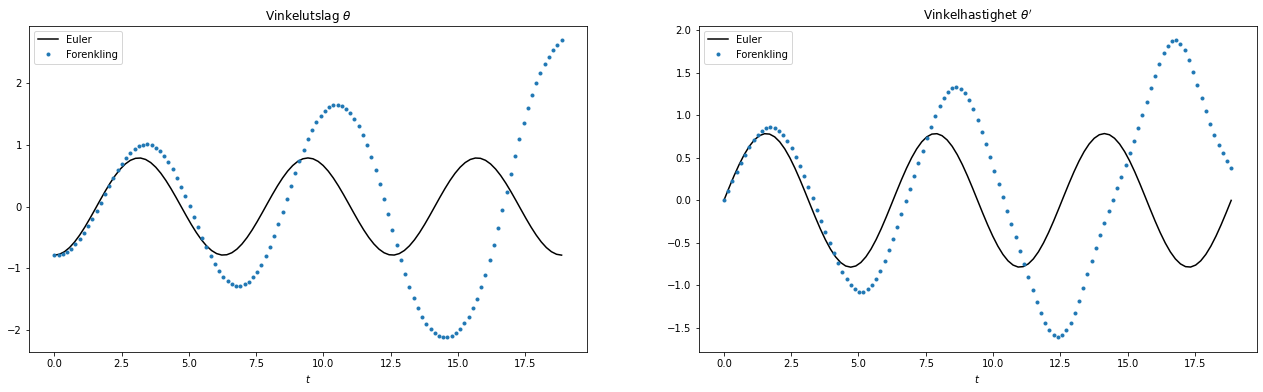

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

omega = 1 # omega
theta0 = -np.pi/4 # startvinkel
phi0 = 0 #start-vinkelhastighet

T = 6*np.pi # slutt-tidspunkt
N = 120 # antall steg med Euler
h = T/N # skrittlengde
tn = np.linspace(0,T,N+1)

def Y(t): # eksakt løsning av forenklet ligning
    return theta0*np.cos(omega*t) + (phi0/omega)*np.sin(omega*t)

def dY(t): # den deriverte av funksjonen ovenfor
    return -omega*theta0*np.sin(omega*t) + phi0*np.cos(omega*t)

Xn = np.zeros([N+1,2]) # liste med verdier for Eulers metode
Xn[0,0] = theta0
Xn[0,1] = phi0

for k in range(0,N): # N steg med Eulers metode for opphavelig ligning
    Xn[k+1,0] = Xn[k,0] + h*Xn[k,1]
    Xn[k+1,1] = Xn[k,1] - h*(omega**2)*np.sin(Xn[k,0])

    
# plott av løsningene
tm = np.linspace(0,T,101)
fig1, (ax11,ax12) = plt.subplots(1,2,figsize=(22,6))

ax11.plot(tm,Y(tm),'k')
ax11.plot(tn, Xn[:,0],'.')
ax11.set_xlabel(r'$t$')
ax11.legend(['Euler','Forenkling'])
ax11.set_title(r'Vinkelutslag $\theta$')

ax12.plot(tm,dY(tm),'k')
ax12.plot(tn,Xn[:,1],'.')
ax12.set_xlabel(r'$t$')
ax12.legend(['Euler','Forenkling'])
ax12.set_title(r"Vinkelhastighet $\theta'$")

Vi ser her at vi har periodisk oppførsel for både tilnærmingen gitt av Eulers metode, og (selvfølgelig) for sinusbevegelsen til det lineariserte systemet.
Dessuten indikerer tilnærmingen vi får med Eulers metode at perioden til løsningen av den opphavelige ligningen (3.13) er lenger enn for løsningene av det lineariserte systemet.

i kan legge merke til at utslagene for tilnærmingen med Eulers metode blir gradivis litt større.
Dette er en bieffekt av Eulers metode: den eksakte løsingen skal ha like store utslag hver gang, siden den skal følge en av de lukkede kurvene i faseportrettet.
Man kan redusere denne økningen ved å velge en mindre steglengde $h$, men den vil alltid være der: på denne måten legger Eulers metode til energi som ikke er der.

---

For å unngå å legge til denne kunstige energien kan man benytte seg av andre numeriske metoder. [Alternative numeriske metoder (**Ikke pensum**, lenke for de som vil lære mer)](3_difflign_pendel_metoder.ipynb)

---